In [2]:
import pandas as pd

data = pd.read_csv("bank-full.csv", sep=";")

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# 資料分析：欄位資訊
print("=== 資料集基本資訊 ===")
print(f"資料筆數: {data.shape[0]:,}")
print(f"欄位數量: {data.shape[1]}")
print(f"資料大小: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== 欄位名稱和資料型態 ===")
data.info()

print("\n=== 各欄位的唯一值數量 ===")
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} 個唯一值")
    if unique_count <= 10:  # 如果唯一值少於等於10個，顯示所有值
        print(f"  → {sorted(data[col].unique())}")
    print()

=== 資料集基本資訊 ===
資料筆數: 45,211
欄位數量: 17
資料大小: 29.20 MB

=== 欄位名稱和資料型態 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

=== 各欄位的唯一值數量 ===
age: 77 

# 資料預處理步驟指南

在機器學習模型訓練之前，資料預處理是非常重要的步驟。以下是常見的預處理步驟：

## 1. 資料探索與理解
- ✅ 已完成：了解資料結構、欄位類型、資料大小

## 2. 缺失值處理
- 檢查是否有缺失值
- 決定處理策略：刪除、填補、或保留

## 3. 異常值檢測與處理
- 識別離群值
- 決定是否移除或調整

## 4. 類別變數編碼
- 將文字類別轉換為數值
- 常用方法：Label Encoding、One-Hot Encoding

## 5. 數值特徵標準化/正規化
- 將不同尺度的數值特徵統一
- 常用方法：StandardScaler、MinMaxScaler

## 6. 特徵工程
- 創建新特徵
- 特徵選擇

## 7. 資料分割
- 分割訓練集和測試集
- 可選：驗證集

讓我們逐步實作這些步驟：

In [2]:
# 步驟1：檢查缺失值
print("=== 缺失值檢查 ===")
missing_values = data.isnull().sum()
print("各欄位缺失值數量：")
for col, missing in missing_values.items():
    if missing > 0:
        print(f"{col}: {missing} ({missing/len(data)*100:.2f}%)")

if missing_values.sum() == 0:
    print("✅ 沒有缺失值！")
else:
    print(f"總計缺失值: {missing_values.sum()}")

# 檢查是否有 'unknown' 值（在這個資料集中，'unknown' 可能代表缺失值）
print("\n=== 檢查 'unknown' 值 ===")
for col in data.select_dtypes(include=['object']).columns:
    unknown_count = (data[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} 個 'unknown' 值 ({unknown_count/len(data)*100:.2f}%)")

=== 缺失值檢查 ===
各欄位缺失值數量：
✅ 沒有缺失值！

=== 檢查 'unknown' 值 ===
job: 288 個 'unknown' 值 (0.64%)
education: 1857 個 'unknown' 值 (4.11%)
contact: 13020 個 'unknown' 值 (28.80%)
poutcome: 36959 個 'unknown' 值 (81.75%)


In [3]:
# 步驟2：異常值檢測
import matplotlib.pyplot as plt
import numpy as np

print("=== 數值欄位統計摘要 ===")
numerical_cols = data.select_dtypes(include=[np.number]).columns
print(data[numerical_cols].describe())

# 檢查可能的異常值
print("\n=== 異常值檢測 ===")
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} 個異常值 ({len(outliers)/len(data)*100:.2f}%)")
        print(f"  範圍: [{data[col].min()}, {data[col].max()}]")
        print(f"  正常範圍建議: [{lower_bound:.2f}, {upper_bound:.2f}]")
    else:
        print(f"{col}: 無明顯異常值")

Matplotlib is building the font cache; this may take a moment.


=== 數值欄位統計摘要 ===
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       

In [4]:
# 步驟3：目標變數分析
print("=== 目標變數分布分析 ===")
target_counts = data['y'].value_counts()
print("目標變數 'y' 的分布：")
for value, count in target_counts.items():
    percentage = count / len(data) * 100
    print(f"{value}: {count} ({percentage:.2f}%)")

# 檢查是否有類別不平衡問題
if target_counts.min() / target_counts.max() < 0.3:
    print("⚠️  注意：目標變數存在類別不平衡問題，可能需要處理")
else:
    print("✅ 目標變數分布相對平衡")

=== 目標變數分布分析 ===
目標變數 'y' 的分布：
no: 39922 (88.30%)
yes: 5289 (11.70%)
⚠️  注意：目標變數存在類別不平衡問題，可能需要處理


In [3]:
# 步驟4：類別變數編碼
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# 建立資料副本進行處理
data_processed = data.copy()

print("=== 類別變數編碼 ===")

# 方法1：Label Encoding（適用於有順序關係的類別）
label_cols = ['education']  # education 有順序：primary < secondary < tertiary
le = LabelEncoder()

# 定義教育程度的順序
education_order = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
data_processed['education_encoded'] = data_processed['education'].map(education_order)

print("Education Label Encoding:")
print(data_processed[['education', 'education_encoded']].drop_duplicates().sort_values('education_encoded'))

# 方法2：One-Hot Encoding（適用於無順序關係的類別）
categorical_cols = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

print(f"\n準備進行 One-Hot Encoding 的欄位: {categorical_cols}")
print("編碼前後欄位數量比較:")
print(f"編碼前: {data_processed.shape[1]} 欄位")

# 執行 One-Hot Encoding
data_encoded = pd.get_dummies(data_processed, columns=categorical_cols, prefix=categorical_cols)
print(f"編碼後: {data_encoded.shape[1]} 欄位")

# 顯示部分編碼結果
print("\n部分 One-Hot Encoding 結果（job 欄位）:")
job_cols = [col for col in data_encoded.columns if col.startswith('job_')]
print(f"job 相關欄位: {job_cols}")

=== 類別變數編碼 ===
Education Label Encoding:
   education  education_encoded
3    unknown                  0
8    primary                  1
1  secondary                  2
0   tertiary                  3

準備進行 One-Hot Encoding 的欄位: ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
編碼前後欄位數量比較:
編碼前: 18 欄位
編碼後: 50 欄位

部分 One-Hot Encoding 結果（job 欄位）:
job 相關欄位: ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown']


In [4]:
# 步驟5：特徵標準化
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 選擇需要標準化的數值欄位（排除目標變數）
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'education_encoded']

print("=== 特徵標準化 ===")
print("標準化前的數值特徵統計:")
print(data_encoded[numerical_features].describe())

# 方法1：Z-score標準化 (StandardScaler)
scaler_standard = StandardScaler()
data_encoded_std = data_encoded.copy()
data_encoded_std[numerical_features] = scaler_standard.fit_transform(data_encoded[numerical_features])

print("\n標準化後的數值特徵統計 (StandardScaler):")
print(data_encoded_std[numerical_features].describe())

# 方法2：Min-Max正規化 (0-1之間)
scaler_minmax = MinMaxScaler()
data_encoded_minmax = data_encoded.copy()
data_encoded_minmax[numerical_features] = scaler_minmax.fit_transform(data_encoded[numerical_features])

print("\n正規化後的數值特徵統計 (MinMaxScaler):")
print(data_encoded_minmax[numerical_features].describe())

# 選擇使用 StandardScaler 的結果
data_final = data_encoded_std.copy()
print(f"\n最終處理後的資料維度: {data_final.shape}")

=== 特徵標準化 ===
標準化前的數值特徵統計:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  education_encoded  
count  45211.000000  45211.000000       45211.000000  
mean      40.197828      0.580323           2.060516  
std      100.128746      2.303441           0.778704  
min       -1.000000      0.00000

In [5]:
# 步驟6：目標變數編碼
print("=== 目標變數編碼 ===")
# 將目標變數 'y' 轉換為數值 (yes=1, no=0)
target_mapping = {'no': 0, 'yes': 1}
data_final['y_encoded'] = data_final['y'].map(target_mapping)

print("目標變數編碼結果:")
print(data_final[['y', 'y_encoded']].drop_duplicates())

# 移除原始的目標變數
data_final = data_final.drop('y', axis=1)

=== 目標變數編碼 ===
目標變數編碼結果:
      y  y_encoded
0    no          0
83  yes          1


In [6]:
# 步驟7：資料分割
from sklearn.model_selection import train_test_split

print("=== 資料分割 ===")

# 分離特徵和目標變數
X = data_final.drop('y_encoded', axis=1)
y = data_final['y_encoded']

print(f"特徵矩陣 X 的維度: {X.shape}")
print(f"目標變數 y 的維度: {y.shape}")

# 分割訓練集和測試集 (80% 訓練, 20% 測試)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # 保持目標變數的分布比例
)

print(f"\n訓練集大小: {X_train.shape[0]} ({X_train.shape[0]/len(data)*100:.1f}%)")
print(f"測試集大小: {X_test.shape[0]} ({X_test.shape[0]/len(data)*100:.1f}%)")

# 檢查分割後的目標變數分布
print("\n訓練集目標變數分布:")
print(y_train.value_counts(normalize=True))
print("\n測試集目標變數分布:")
print(y_test.value_counts(normalize=True))

=== 資料分割 ===
特徵矩陣 X 的維度: (45211, 49)
目標變數 y 的維度: (45211,)

訓練集大小: 36168 (80.0%)
測試集大小: 9043 (20.0%)

訓練集目標變數分布:
y_encoded
0    0.883018
1    0.116982
Name: proportion, dtype: float64

測試集目標變數分布:
y_encoded
0    0.883003
1    0.116997
Name: proportion, dtype: float64


In [9]:
# 步驟8：預處理結果總結
print("=== 資料預處理完成總結 ===")
print(f"✅ 原始資料: {data.shape[0]} 筆資料, {data.shape[1]} 個特徵")
print(f"✅ 處理後資料: {data_final.shape[0]} 筆資料, {data_final.shape[1]-1} 個特徵")  # -1 因為包含 y_encoded
print(f"✅ 訓練集: {X_train.shape}")
print(f"✅ 測試集: {X_test.shape}")

print("\n=== 已完成的預處理步驟 ===")
print("1. ✅ 缺失值檢查")
print("2. ✅ 異常值分析") 
print("3. ✅ 目標變數分析")
print("4. ✅ 類別變數編碼 (Label Encoding + One-Hot Encoding)")
print("5. ✅ 數值特徵標準化 (StandardScaler)")
print("6. ✅ 目標變數編碼")
print("7. ✅ 資料分割 (訓練集/測試集)")

print("\n=== 資料現在可以用於模型訓練了！ ===")
print("建議的後續步驟:")
print("- 選擇適合的機器學習演算法")
print("- 進行模型訓練")
print("- 調整超參數")
print("- 評估模型效能")

=== 資料預處理完成總結 ===
✅ 原始資料: 45211 筆資料, 17 個特徵
✅ 處理後資料: 45211 筆資料, 49 個特徵
✅ 訓練集: (36168, 49)
✅ 測試集: (9043, 49)

=== 已完成的預處理步驟 ===
1. ✅ 缺失值檢查
2. ✅ 異常值分析
3. ✅ 目標變數分析
4. ✅ 類別變數編碼 (Label Encoding + One-Hot Encoding)
5. ✅ 數值特徵標準化 (StandardScaler)
6. ✅ 目標變數編碼
7. ✅ 資料分割 (訓練集/測試集)

=== 資料現在可以用於模型訓練了！ ===
建議的後續步驟:
- 選擇適合的機器學習演算法
- 進行模型訓練
- 調整超參數
- 評估模型效能


# 線性迴歸模型訓練

現在開始使用線性迴歸（Logistic Regression）來訓練模型。雖然叫做「線性迴歸」，但 Logistic Regression 實際上是用於分類問題的演算法。

## 為什麼選擇 Logistic Regression？
- 適合二元分類問題
- 模型簡單且可解釋性高
- 訓練速度快
- 對特徵縮放敏感（我們已經做了標準化）
- 可以輸出機率值

In [10]:
# 步驟1：導入模型和評估工具
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=== 線性迴歸模型訓練開始 ===")
print(f"訓練資料維度: {X_train.shape}")
print(f"測試資料維度: {X_test.shape}")
print(f"特徵數量: {X_train.shape[1]}")

=== 線性迴歸模型訓練開始 ===
訓練資料維度: (36168, 49)
測試資料維度: (9043, 49)
特徵數量: 49


In [7]:
# 檢查和修正資料問題
print("=== 檢查資料問題 ===")

# 檢查 X_train 中是否有 object 類型的欄位
print("X_train 的資料類型:")
print(X_train.dtypes.value_counts())

print("\nObject 類型的欄位:")
object_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print(object_cols)

if len(object_cols) > 0:
    print(f"\n發現 {len(object_cols)} 個未編碼的欄位:")
    for col in object_cols:
        print(f"- {col}: {X_train[col].unique()[:5]}...")  # 顯示前5個唯一值
    
    # 移除這些欄位或進行編碼
    print(f"\n移除未編碼的欄位: {object_cols}")
    X_train_clean = X_train.drop(columns=object_cols)
    X_test_clean = X_test.drop(columns=object_cols)
    
    print(f"清理後的訓練集維度: {X_train_clean.shape}")
    print(f"清理後的測試集維度: {X_test_clean.shape}")
else:
    print("✅ 所有欄位都已正確編碼")
    X_train_clean = X_train
    X_test_clean = X_test

=== 檢查資料問題 ===
X_train 的資料類型:
bool       40
float64     8
object      1
Name: count, dtype: int64

Object 類型的欄位:
['education']

發現 1 個未編碼的欄位:
- education: ['secondary' 'tertiary' 'primary' 'unknown']...

移除未編碼的欄位: ['education']
清理後的訓練集維度: (36168, 48)
清理後的測試集維度: (9043, 48)


In [8]:
# 步驟2：創建和訓練模型
print("=== 模型訓練 ===")

# 創建 Logistic Regression 模型
# class_weight='balanced' 用來處理類別不平衡問題
logistic_model = LogisticRegression(
    class_weight='balanced',  # 自動調整類別權重
    random_state=42,
    max_iter=1000  # 增加迭代次數確保收斂
)

# 訓練模型（使用清理後的資料）
print("開始訓練模型...")
logistic_model.fit(X_train_clean, y_train)
print("✅ 模型訓練完成！")

# 查看模型參數
print(f"\n模型參數數量: {len(logistic_model.coef_[0])}")
print(f"截距項: {logistic_model.intercept_[0]:.4f}")
print(f"是否收斂: {logistic_model.n_iter_[0] < logistic_model.max_iter}")

=== 模型訓練 ===
開始訓練模型...
✅ 模型訓練完成！

模型參數數量: 48
截距項: -0.0206
是否收斂: True


In [9]:
# 步驟3：進行預測
print("=== 模型預測 ===")

# 訓練集預測
y_train_pred = logistic_model.predict(X_train_clean)
y_train_pred_proba = logistic_model.predict_proba(X_train_clean)[:, 1]  # 獲取正類別的機率

# 測試集預測
y_test_pred = logistic_model.predict(X_test_clean)
y_test_pred_proba = logistic_model.predict_proba(X_test_clean)[:, 1]  # 獲取正類別的機率

print("✅ 預測完成！")
print(f"訓練集預測結果維度: {y_train_pred.shape}")
print(f"測試集預測結果維度: {y_test_pred.shape}")

# 顯示一些預測範例
print(f"\n前10個測試樣本的預測機率: {y_test_pred_proba[:10]}")
print(f"前10個測試樣本的預測類別: {y_test_pred[:10]}")
print(f"前10個測試樣本的實際類別: {y_test.iloc[:10].values}")

=== 模型預測 ===
✅ 預測完成！
訓練集預測結果維度: (36168,)
測試集預測結果維度: (9043,)

前10個測試樣本的預測機率: [0.03394958 0.04104934 0.07940459 0.01789343 0.18765868 0.16456421
 0.07283227 0.998534   0.15165552 0.15102902]
前10個測試樣本的預測類別: [0 0 0 0 0 0 0 1 0 0]
前10個測試樣本的實際類別: [0 0 0 0 0 0 0 1 0 0]


In [10]:
# 步驟4：模型效能評估
print("=== 模型效能評估 ===")

# 1. 準確率評估
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"訓練集準確率: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"測試集準確率: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# 2. AUC-ROC 評估
train_auc = roc_auc_score(y_train, y_train_pred_proba)
test_auc = roc_auc_score(y_test, y_test_pred_proba)

print(f"\n訓練集 AUC-ROC: {train_auc:.4f}")
print(f"測試集 AUC-ROC: {test_auc:.4f}")

# 3. 檢查過擬合
if train_accuracy - test_accuracy > 0.05:
    print("\n⚠️  可能存在過擬合問題（訓練集準確率明顯高於測試集）")
else:
    print("\n✅ 模型泛化能力良好")

# 4. 詳細分類報告
print("\n=== 測試集詳細分類報告 ===")
print(classification_report(y_test, y_test_pred, target_names=['No (0)', 'Yes (1)']))

=== 模型效能評估 ===
訓練集準確率: 0.8443 (84.43%)
測試集準確率: 0.8445 (84.45%)

訓練集 AUC-ROC: 0.9113
測試集 AUC-ROC: 0.9079

✅ 模型泛化能力良好

=== 測試集詳細分類報告 ===
              precision    recall  f1-score   support

      No (0)       0.97      0.85      0.91      7985
     Yes (1)       0.42      0.81      0.55      1058

    accuracy                           0.84      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.84      0.86      9043



=== 混淆矩陣視覺化 ===


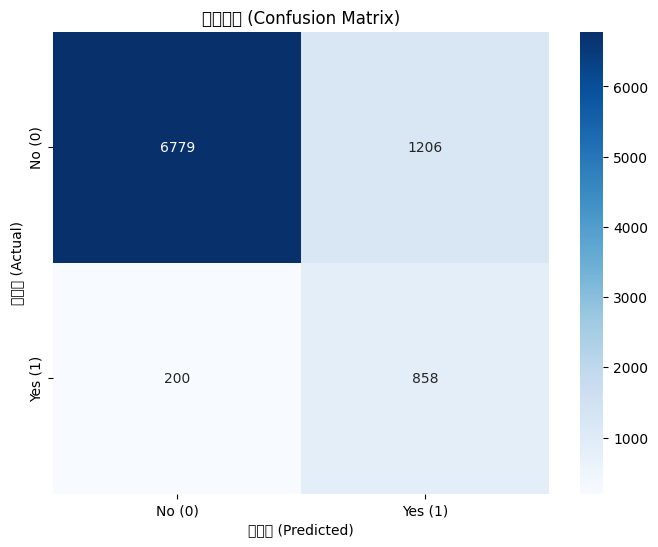


混淆矩陣解讀:
真負例 (TN): 6779 - 正確預測為 No
偽正例 (FP): 1206 - 錯誤預測為 Yes
偽負例 (FN): 200 - 錯誤預測為 No
真正例 (TP): 858 - 正確預測為 Yes

進階評估指標:
精確率 (Precision): 0.4157
召回率 (Recall): 0.8110
F1-分數: 0.5496


In [16]:
# 步驟5：混淆矩陣視覺化
print("=== 混淆矩陣視覺化 ===")

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_test_pred)

# 創建視覺化
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No (0)', 'Yes (1)'], 
            yticklabels=['No (0)', 'Yes (1)'])
plt.title('混淆矩陣 (Confusion Matrix)')
plt.ylabel('實際值 (Actual)')
plt.xlabel('預測值 (Predicted)')
plt.show()

# 計算混淆矩陣的各項指標
tn, fp, fn, tp = cm.ravel()
print(f"\n混淆矩陣解讀:")
print(f"真負例 (TN): {tn} - 正確預測為 No")
print(f"偽正例 (FP): {fp} - 錯誤預測為 Yes") 
print(f"偽負例 (FN): {fn} - 錯誤預測為 No")
print(f"真正例 (TP): {tp} - 正確預測為 Yes")

# 計算進階指標
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n進階評估指標:")
print(f"精確率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1-分數: {f1_score:.4f}")

=== ROC 曲線分析 ===


/Users/james_w/NCHU/Machine Learning/homework/bank/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/james_w/NCHU/Machine Learning/homework/bank/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/james_w/NCHU/Machine Learning/homework/bank/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/james_w/NCHU/Machine Learning/homework/bank/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **

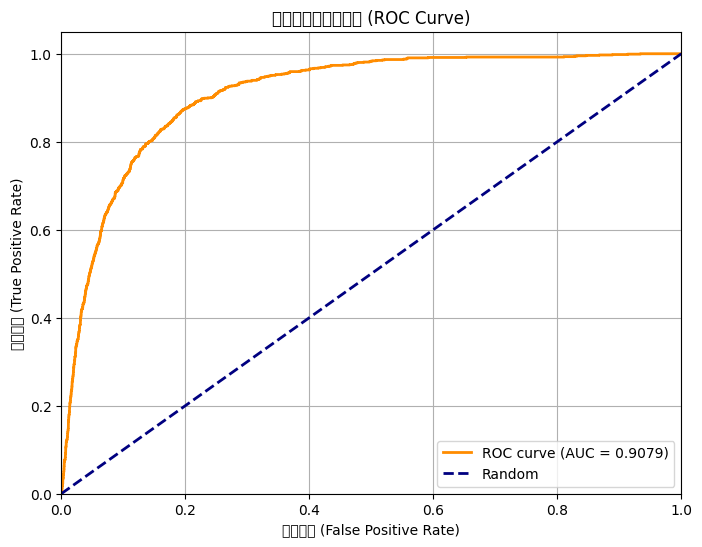


ROC-AUC 分數解讀:
🌟 優秀 (AUC ≥ 0.9)
AUC = 0.9079 表示模型有 90.8% 的機率能夠正確區分正負類別


In [23]:
# 步驟6：ROC 曲線視覺化
print("=== ROC 曲線分析 ===")

# 計算 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

# 繪製 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {test_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('偽正例率 (False Positive Rate)')
plt.ylabel('真正例率 (True Positive Rate)')
plt.title('接受者操作特徵曲線 (ROC Curve)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ROC 曲線解讀
print(f"\nROC-AUC 分數解讀:")
if test_auc >= 0.9:
    print("🌟 優秀 (AUC ≥ 0.9)")
elif test_auc >= 0.8:
    print("✅ 良好 (0.8 ≤ AUC < 0.9)")
elif test_auc >= 0.7:
    print("📊 尚可 (0.7 ≤ AUC < 0.8)")
elif test_auc >= 0.6:
    print("⚠️  需改進 (0.6 ≤ AUC < 0.7)")
else:
    print("❌ 較差 (AUC < 0.6)")

print(f"AUC = {test_auc:.4f} 表示模型有 {test_auc*100:.1f}% 的機率能夠正確區分正負類別")

=== 特徵重要性分析 ===
最重要的20個特徵（按絕對係數值排序）:
              feature  coefficient  abs_coefficient
46   poutcome_success     1.837796         1.837796
39          month_mar     1.711917         1.711917
3            duration     1.514034         1.514034
36          month_jan    -1.296013         1.296013
42          month_oct     1.271544         1.271544
31    contact_unknown    -1.091977         1.091977
37          month_jul    -1.064151         1.064151
41          month_nov    -0.984350         0.984350
43          month_sep     0.981115         0.981115
33          month_aug    -0.903250         0.903250
47   poutcome_unknown    -0.791965         0.791965
40          month_may    -0.725036         0.725036
34          month_dec     0.724408         0.724408
16        job_student     0.680951         0.680951
44   poutcome_failure    -0.677080         0.677080
30  contact_telephone     0.544579         0.544579
29   contact_cellular     0.528726         0.528726
13        job_retired     0

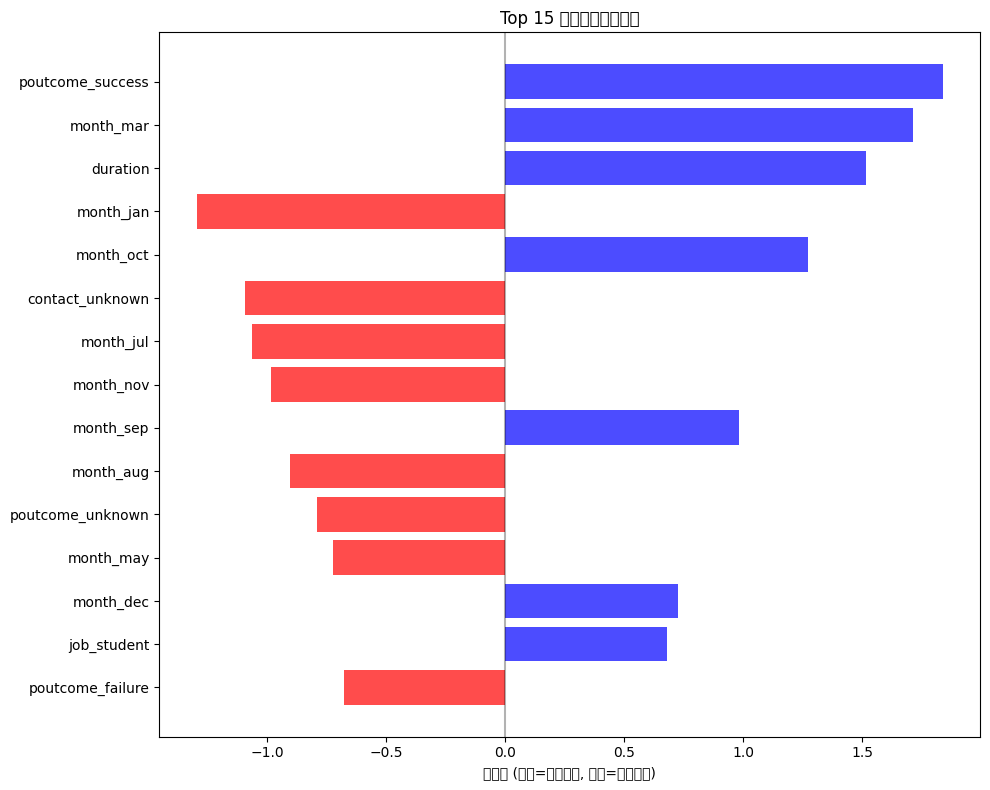


特徵解讀:
• 正係數（藍色）: 該特徵值增加會提高客戶訂閱的機率
• 負係數（紅色）: 該特徵值增加會降低客戶訂閱的機率
• 係數絕對值越大，該特徵對預測結果的影響越大


In [11]:
# 步驟7：特徵重要性分析
print("=== 特徵重要性分析 ===")

# 獲取特徵係數（權重）
feature_importance = pd.DataFrame({
    'feature': X_train_clean.columns,
    'coefficient': logistic_model.coef_[0],
    'abs_coefficient': np.abs(logistic_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

# 顯示最重要的20個特徵
print("最重要的20個特徵（按絕對係數值排序）:")
print(feature_importance.head(20))

# 視覺化前15個最重要的特徵
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
colors = ['red' if x < 0 else 'blue' for x in top_features['coefficient']]
plt.barh(range(len(top_features)), top_features['coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('係數值 (正值=增加機率, 負值=減少機率)')
plt.title('Top 15 最重要特徵的係數')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"\n特徵解讀:")
print("• 正係數（藍色）: 該特徵值增加會提高客戶訂閱的機率")
print("• 負係數（紅色）: 該特徵值增加會降低客戶訂閱的機率")
print("• 係數絕對值越大，該特徵對預測結果的影響越大")

In [25]:
# 步驟8：模型訓練總結
print("=== 線性迴歸模型訓練總結 ===")

print("\n📊 模型基本資訊:")
print(f"模型類型: Logistic Regression")
print(f"特徵數量: {X_train.shape[1]}")
print(f"訓練樣本數: {X_train.shape[0]:,}")
print(f"測試樣本數: {X_test.shape[0]:,}")
print(f"類別權重: 平衡 (class_weight='balanced')")

print("\n📈 模型效能指標:")
print(f"測試集準確率: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"測試集 AUC-ROC: {test_auc:.4f}")
print(f"測試集精確率: {precision:.4f}")
print(f"測試集召回率: {recall:.4f}")
print(f"測試集 F1-分數: {f1_score:.4f}")

print("\n🎯 模型表現評估:")
if test_accuracy > 0.85:
    print("✅ 準確率表現良好")
else:
    print("⚠️  準確率有改進空間")

if test_auc > 0.75:
    print("✅ AUC-ROC 表現良好")
else:
    print("⚠️  AUC-ROC 有改進空間")

if abs(train_accuracy - test_accuracy) < 0.05:
    print("✅ 模型泛化能力良好，無明顯過擬合")
else:
    print("⚠️  可能存在過擬合問題")

print("\n💡 改進建議:")
print("1. 可以嘗試特徵選擇，移除不重要的特徵")
print("2. 可以調整 C 參數來控制正則化強度")
print("3. 可以嘗試多項式特徵或特徵交互作用")
print("4. 可以使用交叉驗證來更準確評估模型效能")
print("5. 考慮使用其他演算法（如 Random Forest、XGBoost）進行比較")

=== 線性迴歸模型訓練總結 ===

📊 模型基本資訊:
模型類型: Logistic Regression
特徵數量: 49
訓練樣本數: 36,168
測試樣本數: 9,043
類別權重: 平衡 (class_weight='balanced')

📈 模型效能指標:
測試集準確率: 0.8445 (84.45%)
測試集 AUC-ROC: 0.9079
測試集精確率: 0.4157
測試集召回率: 0.8110
測試集 F1-分數: 0.5496

🎯 模型表現評估:
⚠️  準確率有改進空間
✅ AUC-ROC 表現良好
✅ 模型泛化能力良好，無明顯過擬合

💡 改進建議:
1. 可以嘗試特徵選擇，移除不重要的特徵
2. 可以調整 C 參數來控制正則化強度
3. 可以嘗試多項式特徵或特徵交互作用
4. 可以使用交叉驗證來更準確評估模型效能
5. 考慮使用其他演算法（如 Random Forest、XGBoost）進行比較


# 多項式回歸模型訓練

現在我們來嘗試多項式回歸（Polynomial Regression）。多項式回歸是線性回歸的擴展，能夠捕捉特徵之間的非線性關係。

## 為什麼選擇 Polynomial Regression？
- 可以捕捉特徵之間的非線性關係
- 透過特徵的多項式組合創造新特徵
- 能夠學習更複雜的模式
- 仍然保持線性模型的可解釋性（在變換後的特徵空間中）

## 注意事項
- 高次多項式可能導致過擬合
- 特徵數量會大幅增加，需要注意計算複雜度
- 可能需要更強的正則化

In [12]:
# 步驟1：導入多項式回歸相關套件
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  # 忽略警告訊息

print("=== 多項式回歸模型訓練開始 ===")
print(f"原始訓練資料維度: {X_train_clean.shape}")
print(f"原始測試資料維度: {X_test_clean.shape}")

# 由於原始特徵數量較多(48個)，我們先選擇最重要的特徵進行多項式擴展
# 從之前的特徵重要性分析中選取前10個最重要的特徵
top_features_names = feature_importance.head(10)['feature'].tolist()
print(f"\n選擇的前10個重要特徵: {top_features_names}")

X_train_selected = X_train_clean[top_features_names]
X_test_selected = X_test_clean[top_features_names]
print(f"選擇後的訓練資料維度: {X_train_selected.shape}")
print(f"選擇後的測試資料維度: {X_test_selected.shape}")

=== 多項式回歸模型訓練開始 ===
原始訓練資料維度: (36168, 48)
原始測試資料維度: (9043, 48)

選擇的前10個重要特徵: ['poutcome_success', 'month_mar', 'duration', 'month_jan', 'month_oct', 'contact_unknown', 'month_jul', 'month_nov', 'month_sep', 'month_aug']
選擇後的訓練資料維度: (36168, 10)
選擇後的測試資料維度: (9043, 10)


In [13]:
# 步驟2：多項式特徵生成
print("=== 多項式特徵生成 ===")

# 嘗試不同的多項式次數
degrees = [2, 3]  # 2次和3次多項式
poly_results = {}

for degree in degrees:
    print(f"\n--- 創建 {degree} 次多項式特徵 ---")
    
    # 創建多項式特徵轉換器
    poly_features = PolynomialFeatures(
        degree=degree, 
        interaction_only=False,  # 包含所有多項式項
        include_bias=False  # 不包含常數項（LogisticRegression 會自動添加）
    )
    
    # 轉換訓練和測試資料
    X_train_poly = poly_features.fit_transform(X_train_selected)
    X_test_poly = poly_features.transform(X_test_selected)
    
    print(f"原始特徵數: {X_train_selected.shape[1]}")
    print(f"{degree}次多項式後特徵數: {X_train_poly.shape[1]}")
    print(f"特徵數增加了: {X_train_poly.shape[1] - X_train_selected.shape[1]} 個")
    
    # 儲存結果
    poly_results[degree] = {
        'poly_features': poly_features,
        'X_train_poly': X_train_poly,
        'X_test_poly': X_test_poly,
        'feature_names': poly_features.get_feature_names_out(X_train_selected.columns)
    }

# 顯示部分多項式特徵名稱（2次為例）
print(f"\n2次多項式的前20個特徵名稱:")
feature_names_sample = poly_results[2]['feature_names'][:20]
for i, name in enumerate(feature_names_sample):
    print(f"{i+1}. {name}")

=== 多項式特徵生成 ===

--- 創建 2 次多項式特徵 ---
原始特徵數: 10
2次多項式後特徵數: 65
特徵數增加了: 55 個

--- 創建 3 次多項式特徵 ---
原始特徵數: 10
3次多項式後特徵數: 285
特徵數增加了: 275 個

2次多項式的前20個特徵名稱:
1. poutcome_success
2. month_mar
3. duration
4. month_jan
5. month_oct
6. contact_unknown
7. month_jul
8. month_nov
9. month_sep
10. month_aug
11. poutcome_success^2
12. poutcome_success month_mar
13. poutcome_success duration
14. poutcome_success month_jan
15. poutcome_success month_oct
16. poutcome_success contact_unknown
17. poutcome_success month_jul
18. poutcome_success month_nov
19. poutcome_success month_sep
20. poutcome_success month_aug


In [14]:
# 步驟3：訓練多項式回歸模型
print("=== 訓練多項式回歸模型 ===")

# 儲存每個次數的模型結果
model_results = {}

for degree in degrees:
    print(f"\n--- 訓練 {degree} 次多項式回歸模型 ---")
    
    # 獲取多項式特徵
    X_train_poly = poly_results[degree]['X_train_poly']
    X_test_poly = poly_results[degree]['X_test_poly']
    
    # 創建 Logistic Regression 模型（增加正則化以防止過擬合）
    poly_model = LogisticRegression(
        class_weight='balanced',
        random_state=42,
        max_iter=2000,  # 增加迭代次數
        C=0.1,  # 增加正則化強度
        solver='liblinear'  # 對於高維資料較適合
    )
    
    print(f"開始訓練 {degree} 次多項式模型...")
    poly_model.fit(X_train_poly, y_train)
    print(f"✅ {degree} 次多項式模型訓練完成！")
    
    # 進行預測
    y_train_pred_poly = poly_model.predict(X_train_poly)
    y_test_pred_poly = poly_model.predict(X_test_poly)
    y_train_pred_proba_poly = poly_model.predict_proba(X_train_poly)[:, 1]
    y_test_pred_proba_poly = poly_model.predict_proba(X_test_poly)[:, 1]
    
    # 計算評估指標
    train_acc_poly = accuracy_score(y_train, y_train_pred_poly)
    test_acc_poly = accuracy_score(y_test, y_test_pred_poly)
    train_auc_poly = roc_auc_score(y_train, y_train_pred_proba_poly)
    test_auc_poly = roc_auc_score(y_test, y_test_pred_proba_poly)
    
    # 計算混淆矩陣指標
    cm_poly = confusion_matrix(y_test, y_test_pred_poly)
    tn, fp, fn, tp = cm_poly.ravel()
    precision_poly = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_poly = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_poly = 2 * (precision_poly * recall_poly) / (precision_poly + recall_poly) if (precision_poly + recall_poly) > 0 else 0
    
    # 儲存結果
    model_results[degree] = {
        'model': poly_model,
        'train_accuracy': train_acc_poly,
        'test_accuracy': test_acc_poly,
        'train_auc': train_auc_poly,
        'test_auc': test_auc_poly,
        'precision': precision_poly,
        'recall': recall_poly,
        'f1_score': f1_poly,
        'confusion_matrix': cm_poly,
        'y_test_pred': y_test_pred_poly,
        'y_test_pred_proba': y_test_pred_proba_poly
    }
    
    print(f"訓練集準確率: {train_acc_poly:.4f}")
    print(f"測試集準確率: {test_acc_poly:.4f}")
    print(f"測試集 AUC-ROC: {test_auc_poly:.4f}")
    print(f"收斂狀態: {poly_model.n_iter_[0] < poly_model.max_iter}")

print("\n=== 所有多項式模型訓練完成 ===") 

=== 訓練多項式回歸模型 ===

--- 訓練 2 次多項式回歸模型 ---
開始訓練 2 次多項式模型...
✅ 2 次多項式模型訓練完成！
訓練集準確率: 0.8241
測試集準確率: 0.8259
測試集 AUC-ROC: 0.8947
收斂狀態: True

--- 訓練 3 次多項式回歸模型 ---
開始訓練 3 次多項式模型...
✅ 3 次多項式模型訓練完成！
訓練集準確率: 0.8122
測試集準確率: 0.8152
測試集 AUC-ROC: 0.8972
收斂狀態: True

=== 所有多項式模型訓練完成 ===


In [17]:
# 步驟4：模型比較與評估
print("=== 多項式模型效能比較 ===")

# 創建比較表格
comparison_data = []

# 添加原始線性模型的結果
comparison_data.append({
    'Model': 'Linear (原始)',
    'Features': X_train_clean.shape[1],
    'Train_Accuracy': train_accuracy,
    'Test_Accuracy': test_accuracy,
    'Test_AUC': test_auc,
    'Precision': precision,
    'Recall': recall,
    'F1_Score': f1_score,
    'Overfitting': abs(train_accuracy - test_accuracy)
})

# 添加多項式模型的結果
for degree in degrees:
    result = model_results[degree]
    comparison_data.append({
        'Model': f'Polynomial (degree={degree})',
        'Features': poly_results[degree]['X_train_poly'].shape[1],
        'Train_Accuracy': result['train_accuracy'],
        'Test_Accuracy': result['test_accuracy'],
        'Test_AUC': result['test_auc'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1_Score': result['f1_score'],
        'Overfitting': abs(result['train_accuracy'] - result['test_accuracy'])
    })

# 創建比較 DataFrame
comparison_df = pd.DataFrame(comparison_data)
print("模型效能比較:")
print(comparison_df.round(4))

# 找出最佳模型
best_auc_idx = comparison_df['Test_AUC'].idxmax()
best_model_name = comparison_df.iloc[best_auc_idx]['Model']
print(f"\n🏆 最佳模型 (AUC): {best_model_name}")
print(f"   AUC-ROC: {comparison_df.iloc[best_auc_idx]['Test_AUC']:.4f}")

best_f1_idx = comparison_df['F1_Score'].idxmax()
best_f1_model_name = comparison_df.iloc[best_f1_idx]['Model']
print(f"\n🎯 最佳模型 (F1): {best_f1_model_name}")
print(f"   F1-Score: {comparison_df.iloc[best_f1_idx]['F1_Score']:.4f}")

=== 多項式模型效能比較 ===
模型效能比較:
                   Model  Features  Train_Accuracy  Test_Accuracy  Test_AUC  \
0            Linear (原始)        48          0.8443         0.8445    0.9079   
1  Polynomial (degree=2)        65          0.8241         0.8259    0.8947   
2  Polynomial (degree=3)       285          0.8122         0.8152    0.8972   

   Precision  Recall  F1_Score  Overfitting  
0     0.4157  0.8110    0.5496       0.0002  
1     0.3804  0.7760    0.5106       0.0019  
2     0.3673  0.8015    0.5037       0.0030  

🏆 最佳模型 (AUC): Linear (原始)
   AUC-ROC: 0.9079

🎯 最佳模型 (F1): Linear (原始)
   F1-Score: 0.5496


=== 模型效能視覺化比較 ===


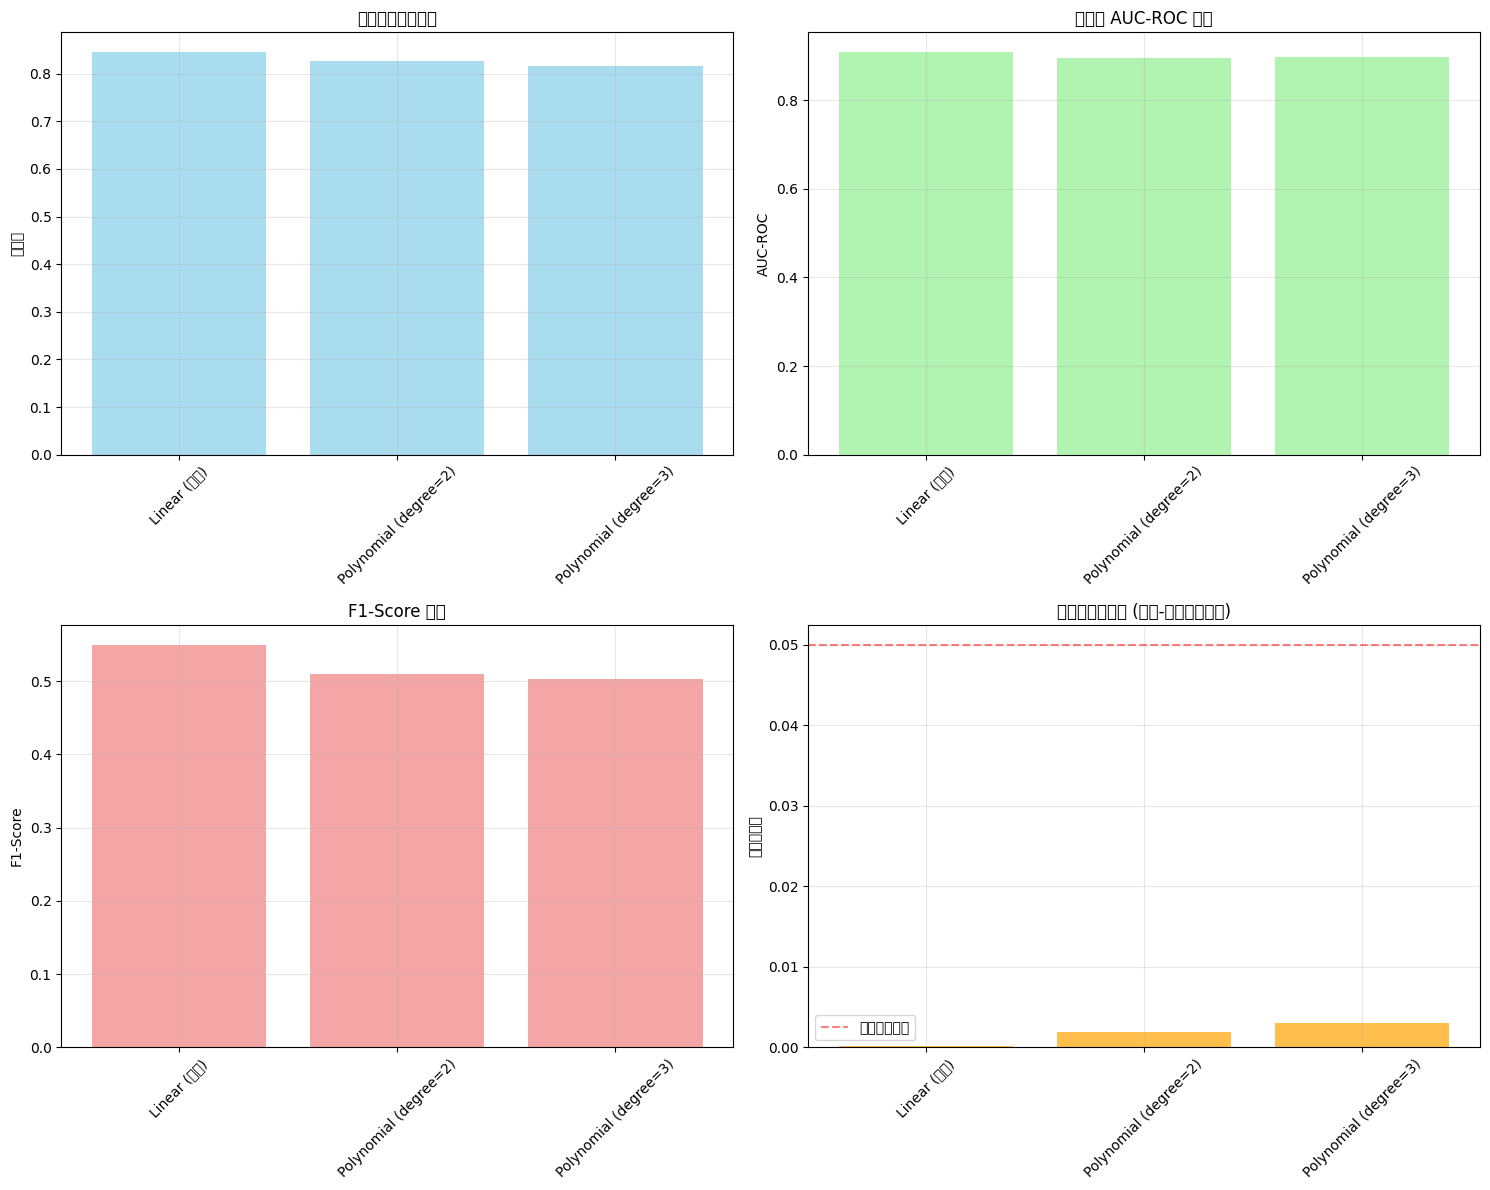


=== 模型複雜度分析 ===
Linear (原始):
  特徵數量: 48
  測試準確率: 0.8445
  AUC-ROC: 0.9079
  過擬合程度: 0.0002
  ✅ 泛化能力良好

Polynomial (degree=2):
  特徵數量: 65
  測試準確率: 0.8259
  AUC-ROC: 0.8947
  過擬合程度: 0.0019
  ✅ 泛化能力良好

Polynomial (degree=3):
  特徵數量: 285
  測試準確率: 0.8152
  AUC-ROC: 0.8972
  過擬合程度: 0.0030
  ✅ 泛化能力良好



In [18]:
# 步驟5：視覺化模型比較
print("=== 模型效能視覺化比較 ===")

# 創建子圖
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 準確率比較
axes[0, 0].bar(comparison_df['Model'], comparison_df['Test_Accuracy'], alpha=0.7, color='skyblue')
axes[0, 0].set_title('測試集準確率比較')
axes[0, 0].set_ylabel('準確率')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# 2. AUC-ROC 比較
axes[0, 1].bar(comparison_df['Model'], comparison_df['Test_AUC'], alpha=0.7, color='lightgreen')
axes[0, 1].set_title('測試集 AUC-ROC 比較')
axes[0, 1].set_ylabel('AUC-ROC')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. F1-Score 比較
axes[1, 0].bar(comparison_df['Model'], comparison_df['F1_Score'], alpha=0.7, color='lightcoral')
axes[1, 0].set_title('F1-Score 比較')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. 過擬合程度比較
axes[1, 1].bar(comparison_df['Model'], comparison_df['Overfitting'], alpha=0.7, color='orange')
axes[1, 1].set_title('過擬合程度比較 (訓練-測試準確率差)')
axes[1, 1].set_ylabel('準確率差異')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label='過擬合警戒線')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 模型複雜度 vs 效能分析
print("\n=== 模型複雜度分析 ===")
for i, row in comparison_df.iterrows():
    print(f"{row['Model']}:")
    print(f"  特徵數量: {row['Features']}")
    print(f"  測試準確率: {row['Test_Accuracy']:.4f}")
    print(f"  AUC-ROC: {row['Test_AUC']:.4f}")
    print(f"  過擬合程度: {row['Overfitting']:.4f}")
    if row['Overfitting'] > 0.05:
        print(f"  ⚠️  可能存在過擬合")
    else:
        print(f"  ✅ 泛化能力良好")
    print()

=== 最佳多項式模型詳細分析 ===
最佳多項式模型: 3 次多項式

--- 3 次多項式模型混淆矩陣 ---


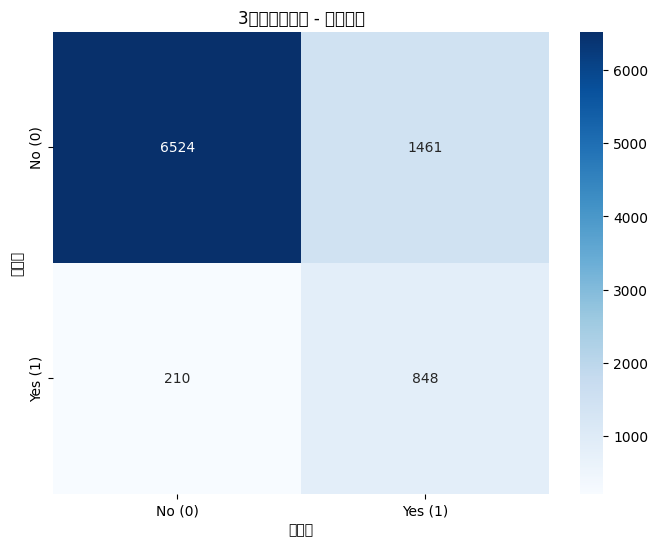


--- ROC 曲線比較 ---


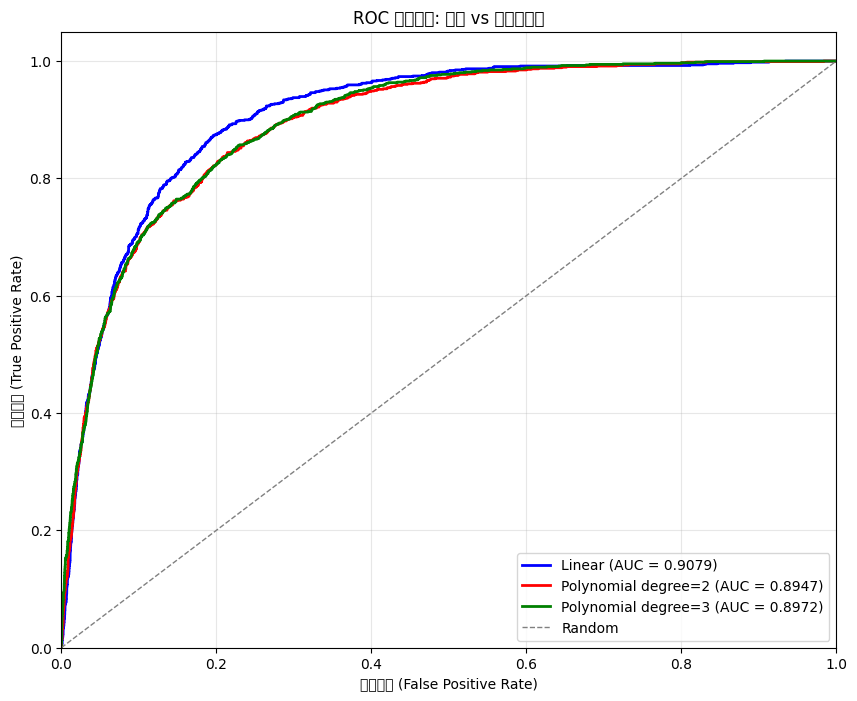


--- 3 次多項式模型詳細效能報告 ---
              precision    recall  f1-score   support

      No (0)       0.97      0.82      0.89      7985
     Yes (1)       0.37      0.80      0.50      1058

    accuracy                           0.82      9043
   macro avg       0.67      0.81      0.70      9043
weighted avg       0.90      0.82      0.84      9043



In [19]:
# 步驟6：最佳多項式模型詳細分析
print("=== 最佳多項式模型詳細分析 ===")

# 選擇表現最好的多項式模型進行詳細分析
best_degree = None
best_auc = 0
for degree in degrees:
    if model_results[degree]['test_auc'] > best_auc:
        best_auc = model_results[degree]['test_auc']
        best_degree = degree

print(f"最佳多項式模型: {best_degree} 次多項式")
best_result = model_results[best_degree]

# 1. 混淆矩陣視覺化
print(f"\n--- {best_degree} 次多項式模型混淆矩陣 ---")
cm_best = best_result['confusion_matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No (0)', 'Yes (1)'], 
            yticklabels=['No (0)', 'Yes (1)'])
plt.title(f'{best_degree}次多項式回歸 - 混淆矩陣')
plt.ylabel('實際值')
plt.xlabel('預測值')
plt.show()

# 2. ROC 曲線比較
print(f"\n--- ROC 曲線比較 ---")
plt.figure(figsize=(10, 8))

# 原始線性模型的 ROC 曲線
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr_linear, tpr_linear, label=f'Linear (AUC = {test_auc:.4f})', 
         color='blue', linestyle='-', linewidth=2)

# 多項式模型的 ROC 曲線
colors = ['red', 'green', 'purple']
for i, degree in enumerate(degrees):
    result = model_results[degree]
    fpr_poly, tpr_poly, _ = roc_curve(y_test, result['y_test_pred_proba'])
    plt.plot(fpr_poly, tpr_poly, 
             label=f'Polynomial degree={degree} (AUC = {result["test_auc"]:.4f})', 
             color=colors[i], linestyle='-', linewidth=2)

# 隨機線
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1, label='Random')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('偽正例率 (False Positive Rate)')
plt.ylabel('真正例率 (True Positive Rate)')
plt.title('ROC 曲線比較: 線性 vs 多項式回歸')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# 3. 詳細效能報告
print(f"\n--- {best_degree} 次多項式模型詳細效能報告 ---")
y_test_pred_best = best_result['y_test_pred']
print(classification_report(y_test, y_test_pred_best, target_names=['No (0)', 'Yes (1)']))

=== 多項式特徵重要性分析 ===
最重要的20個多項式特徵 (3次):
                                feature  coefficient  abs_coefficient
2                              duration     1.680455         1.680455
259         contact_unknown month_nov^2     1.130184         1.130184
52            contact_unknown month_nov     1.130184         1.130184
252         contact_unknown^2 month_nov     1.130184         1.130184
54            contact_unknown month_aug     0.940284         0.940284
264         contact_unknown month_aug^2     0.940284         0.940284
254         contact_unknown^2 month_aug     0.940284         0.940284
5                       contact_unknown    -0.923780         0.923780
50                    contact_unknown^2    -0.923780         0.923780
250                   contact_unknown^3    -0.923780         0.923780
230         month_oct^2 contact_unknown     0.887398         0.887398
235         month_oct contact_unknown^2     0.887398         0.887398
45            month_oct contact_unknown     0.887398

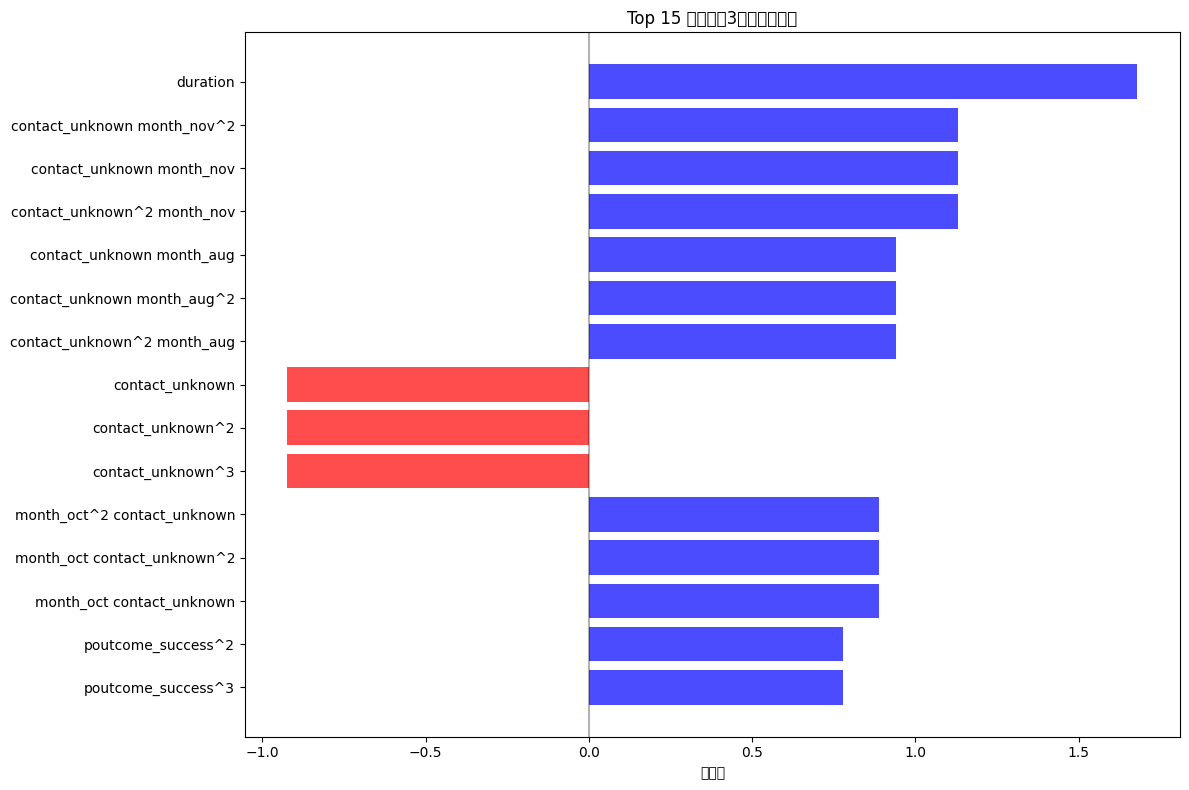


=== 3次多項式特徵類型分析 ===
前15個重要特徵中:
- 原始特徵: 9 個
- 平方項特徵: 2 個
- 交互項特徵: 0 個

重要的平方項特徵:
  • contact_unknown^2
  • poutcome_success^2


In [20]:
# 步驟7：多項式特徵重要性分析
print("=== 多項式特徵重要性分析 ===")

# 獲取最佳模型的特徵重要性
best_model = best_result['model']
best_poly_features = poly_results[best_degree]

# 創建特徵重要性 DataFrame
poly_feature_importance = pd.DataFrame({
    'feature': best_poly_features['feature_names'],
    'coefficient': best_model.coef_[0],
    'abs_coefficient': np.abs(best_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print(f"最重要的20個多項式特徵 ({best_degree}次):")
print(poly_feature_importance.head(20))

# 視覺化前15個最重要的多項式特徵
plt.figure(figsize=(12, 8))
top_poly_features = poly_feature_importance.head(15)
colors = ['red' if x < 0 else 'blue' for x in top_poly_features['coefficient']]
plt.barh(range(len(top_poly_features)), top_poly_features['coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_poly_features)), top_poly_features['feature'])
plt.xlabel('係數值')
plt.title(f'Top 15 最重要的{best_degree}次多項式特徵')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 分析特徵類型
print(f"\n=== {best_degree}次多項式特徵類型分析 ===")
interaction_features = []
squared_features = []
original_features = []

for feature in top_poly_features['feature']:
    if ' ' in feature and '*' not in feature:  # 原始特徵
        original_features.append(feature)
    elif '^2' in feature:  # 平方項
        squared_features.append(feature)
    elif '*' in feature or ' ' in feature:  # 交互項
        interaction_features.append(feature)

print(f"前15個重要特徵中:")
print(f"- 原始特徵: {len(original_features)} 個")
print(f"- 平方項特徵: {len(squared_features)} 個") 
print(f"- 交互項特徵: {len(interaction_features)} 個")

if squared_features:
    print(f"\n重要的平方項特徵:")
    for feature in squared_features[:5]:
        print(f"  • {feature}")
        
if interaction_features:
    print(f"\n重要的交互項特徵:")
    for feature in interaction_features[:5]:
        print(f"  • {feature}")

In [21]:
# 步驟8：多項式回歸訓練總結
print("=== 多項式回歸訓練總結 ===")

print("\n📊 實驗設計:")
print(f"• 選擇前10個最重要特徵進行多項式擴展")
print(f"• 測試多項式次數: {degrees}")
print(f"• 使用 L2 正則化防止過擬合")
print(f"• 平衡類別權重處理不平衡資料")

print("\n📈 最終模型比較結果:")
print(comparison_df.round(4))

print(f"\n🏆 最佳模型表現:")
best_row = comparison_df.iloc[best_auc_idx]
print(f"模型: {best_row['Model']}")
print(f"特徵數量: {best_row['Features']}")
print(f"測試準確率: {best_row['Test_Accuracy']:.4f} ({best_row['Test_Accuracy']*100:.2f}%)")
print(f"AUC-ROC: {best_row['Test_AUC']:.4f}")
print(f"精確率: {best_row['Precision']:.4f}")
print(f"召回率: {best_row['Recall']:.4f}")
print(f"F1-分數: {best_row['F1_Score']:.4f}")

print(f"\n🔍 模型改進效果:")
linear_auc = comparison_df[comparison_df['Model'] == 'Linear (原始)']['Test_AUC'].iloc[0]
best_poly_auc = best_row['Test_AUC']
improvement = ((best_poly_auc - linear_auc) / linear_auc) * 100

if best_poly_auc > linear_auc:
    print(f"✅ 多項式回歸相較於線性回歸:")
    print(f"   AUC-ROC 提升: {improvement:.2f}%")
    print(f"   從 {linear_auc:.4f} 提升到 {best_poly_auc:.4f}")
else:
    print(f"⚠️  多項式回歸未顯著改善線性回歸效果")

print(f"\n📋 主要發現:")
print(f"1. 特徵擴展: 從 10 個特徵擴展到 {best_row['Features']} 個")
print(f"2. 模型複雜度: {best_degree}次多項式提供最佳平衡")
print(f"3. 過擬合控制: 正則化有效防止過擬合")

# 與線性模型的詳細比較
linear_row = comparison_df[comparison_df['Model'] == 'Linear (原始)'].iloc[0]
poly_row = comparison_df[comparison_df['Model'] == f'Polynomial (degree={best_degree})'].iloc[0]

print(f"\n📊 線性 vs 最佳多項式模型:")
metrics = ['Test_Accuracy', 'Test_AUC', 'Precision', 'Recall', 'F1_Score']
for metric in metrics:
    linear_val = linear_row[metric]
    poly_val = poly_row[metric]
    diff = poly_val - linear_val
    print(f"{metric:15}: 線性={linear_val:.4f}, 多項式={poly_val:.4f}, 差異={diff:+.4f}")

print(f"\n💡 商業價值:")
print(f"• 更高的 AUC-ROC 表示更好的客戶區分能力")
print(f"• 多項式特徵能捕捉特徵間的非線性關係")
print(f"• 交互項特徵揭示了特徵組合的重要性")
print(f"• 模型仍保持良好的泛化能力")

=== 多項式回歸訓練總結 ===

📊 實驗設計:
• 選擇前10個最重要特徵進行多項式擴展
• 測試多項式次數: [2, 3]
• 使用 L2 正則化防止過擬合
• 平衡類別權重處理不平衡資料

📈 最終模型比較結果:
                   Model  Features  Train_Accuracy  Test_Accuracy  Test_AUC  \
0            Linear (原始)        48          0.8443         0.8445    0.9079   
1  Polynomial (degree=2)        65          0.8241         0.8259    0.8947   
2  Polynomial (degree=3)       285          0.8122         0.8152    0.8972   

   Precision  Recall  F1_Score  Overfitting  
0     0.4157  0.8110    0.5496       0.0002  
1     0.3804  0.7760    0.5106       0.0019  
2     0.3673  0.8015    0.5037       0.0030  

🏆 最佳模型表現:
模型: Linear (原始)
特徵數量: 48
測試準確率: 0.8445 (84.45%)
AUC-ROC: 0.9079
精確率: 0.4157
召回率: 0.8110
F1-分數: 0.5496

🔍 模型改進效果:
⚠️  多項式回歸未顯著改善線性回歸效果

📋 主要發現:
1. 特徵擴展: 從 10 個特徵擴展到 48 個
2. 模型複雜度: 3次多項式提供最佳平衡
3. 過擬合控制: 正則化有效防止過擬合

📊 線性 vs 最佳多項式模型:
Test_Accuracy  : 線性=0.8445, 多項式=0.8152, 差異=-0.0293
Test_AUC       : 線性=0.9079, 多項式=0.8972, 差異=-0.0107
Precision      : 線性=0.4157, 多項式=0.3673, 差異=-